<a href="https://colab.research.google.com/github/NabihaKhan3011/python/blob/main/medical_insurance_peediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
#loaing the data from csv file to a pandas dataframe
insurance_dataset=pd.read_csv('/content/medical doc..csv')


In [ ]:
#first 5 rows of the dataframe
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
#no of ros and columns
insurance_dataset.shape

(1338, 7)

In [ ]:
#getting info about dataset
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
#check missing values
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
#statistical measures of the dataset
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<ipython-input-11-30bd7651d2c1>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['age'])


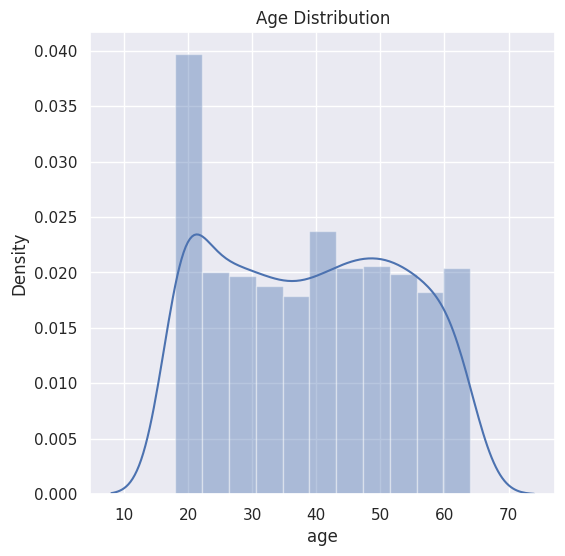

In [ ]:
#distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['age'])
plt.title('Age Distribution')
plt.show()

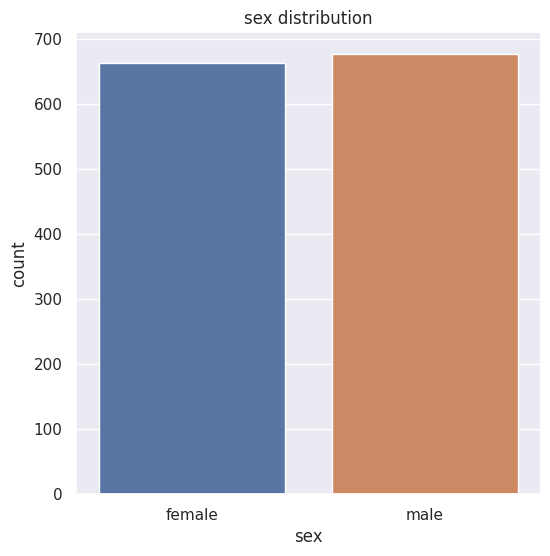

In [ ]:
#gender coloumn
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=insurance_dataset)
plt.title('sex distribution')
plt.show()

In [ ]:
insurance_dataset['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

<Figure size 600x600 with 0 Axes>

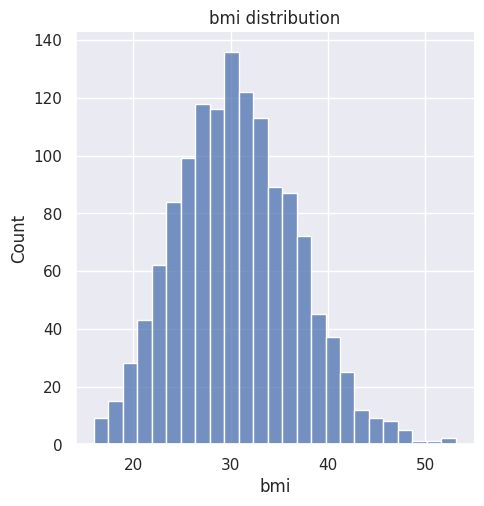

In [ ]:
#BMI distribution
plt.figure(figsize=(6,6))
sns.displot(insurance_dataset['bmi'])
plt.title('bmi distribution')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

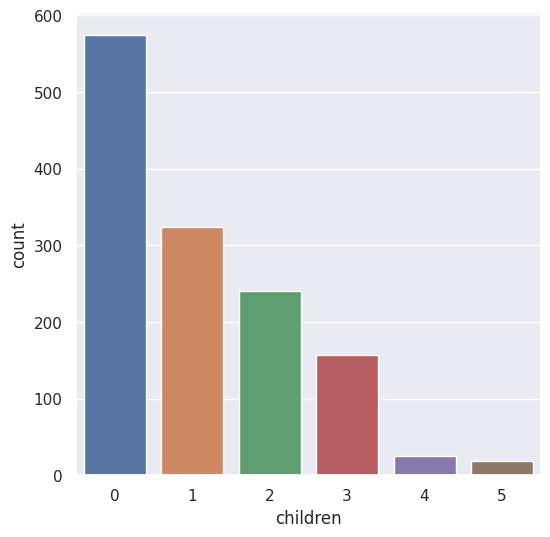

In [ ]:
#children coloumn
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=insurance_dataset)
plt.show

In [ ]:
insurance_dataset['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

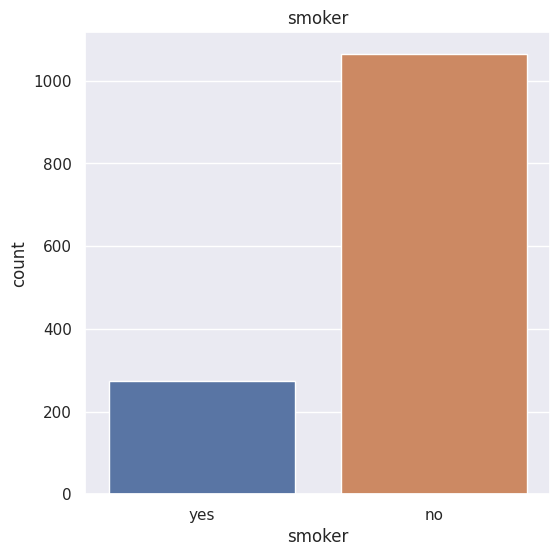

In [ ]:
#smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=insurance_dataset)
plt.title('smoker')
plt.show

In [ ]:
insurance_dataset['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

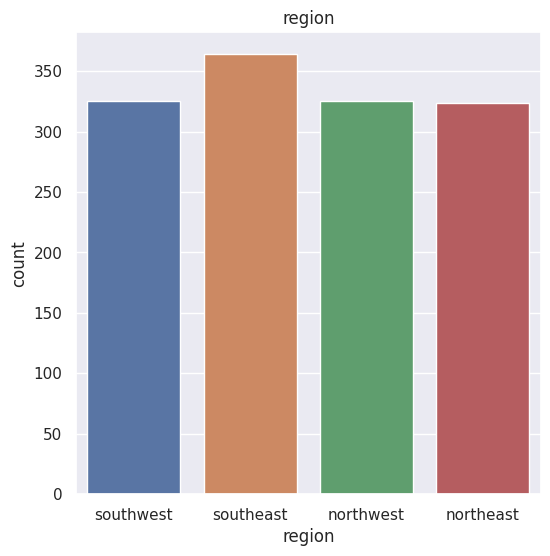

In [ ]:
#region coloumn
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=insurance_dataset)
plt.title('region')
plt.show

In [ ]:
insurance_dataset['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

<ipython-input-26-f5fb392bf342>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['charges'])


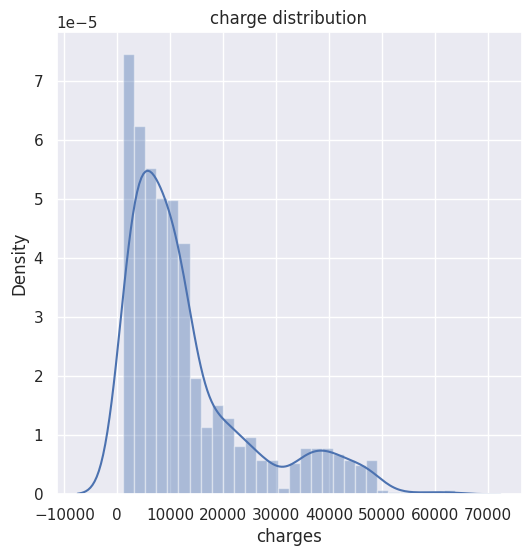

In [ ]:
#distribution of charges value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['charges'])
plt.title('charge distribution')
plt.show()

In [ ]:
#encoding sex coloumn
insurance_dataset.replace({'sex':{'male':0,'female':1}},inplace=True)

#encoding smoker coloumn
insurance_dataset.replace({'smoker':{'yes':1,'no':0}},inplace=True)

#endoding region coloumn
insurance_dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)

In [ ]:
#splitting the features and targets
X=insurance_dataset.drop(columns='charges',axis=1)
Y=insurance_dataset['charges']

In [ ]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       1       1
1      18    0  33.770         1       0       0
2      28    0  33.000         3       0       0
3      33    0  22.705         0       0       3
4      32    0  28.880         0       0       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       0       3
1334   18    1  31.920         0       0       2
1335   18    1  36.850         0       0       0
1336   21    1  25.800         0       0       1
1337   61    1  29.070         0       1       3

[1338 rows x 6 columns]


In [ ]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [ ]:
#splitting the data to training data and testing data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [ ]:
#model training
#loading the linear regression model
regressor=LinearRegression()

In [ ]:
regressor.fit(X_train,Y_train)

LinearRegression()

In [ ]:
#prediction on training data
training_data_prediction=regressor.predict(X_train)

In [ ]:
# R squared value
r2_train=metrics.r2_score(Y_train,training_data_prediction)
print('Rsquared value:',r2_train)

Rsquared value: 0.751505643411174


In [ ]:
#prediction on test data
test_data_prediction=regressor.predict(X_test)


In [ ]:
r2_test=metrics.r2_score(Y_test,test_data_prediction)
print('R squared value:',r2_test)

R squared value: 0.7447273869684076


In [ ]:
#build a predictive system
input_data=(31,1,25.74,0,1,0)

#changing input_datato a numpy array
input_data_as_numpy_array=np.asarray(input_data)

#reshapethe array
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

prediction=regressor.predict(input_data_reshaped)


print('The insurance cost is USD',prediction[0])

The insurance cost is USD 27688.182287107258


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
